In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
dataset= pd.read_csv(r"D:\target\ml\survivalPredictionTitanic\dataset\Titanic-Dataset.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 12)

In [5]:
dataset=dataset.drop(columns=['Name','Cabin','Ticket','PassengerId'])

In [6]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
dataset.value_counts('Survived')

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


le = LabelEncoder()
dataset['Sex']=dataset['Sex'].replace({'male':1,'female':0})
dataset['Embarked']=dataset['Embarked'].replace({'C':1,'Q':2,'S':0})
# Drop rows where 'Age' is NaN
# Drop rows where any of the 'Sex', 'Age', or 'Embarked' columns contain NaN values
dataset = dataset.dropna(subset=['Sex', 'Age', 'Embarked'])

# Verify the changes
print(dataset[['Sex', 'Age', 'Embarked']].head())



   Sex   Age  Embarked
0    1  22.0       0.0
1    0  38.0       1.0
2    0  26.0       0.0
3    0  35.0       0.0
4    1  35.0       0.0


C:\Users\Asus\AppData\Local\Temp\ipykernel_18504\1237872701.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Sex']=dataset['Sex'].replace({'male':1,'female':0})
C:\Users\Asus\AppData\Local\Temp\ipykernel_18504\1237872701.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Embarked']=dataset['Embarked'].replace({'C':1,'Q':2,'S':0})


In [9]:
dataset.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
6,0,1,1,54.0,0,0,51.8625,0.0
7,0,3,1,2.0,3,1,21.0750,0.0
8,1,3,0,27.0,0,2,11.1333,0.0
9,1,2,0,14.0,1,0,30.0708,1.0
10,1,3,0,4.0,1,1,16.7000,0.0


In [10]:
X=dataset.drop(columns='Survived')
Y=dataset['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0.0
1,1,0,38.0,1,0,71.2833,1.0
2,3,0,26.0,0,0,7.9250,0.0
3,1,0,35.0,1,0,53.1000,0.0
4,3,1,35.0,0,0,8.0500,0.0


In [11]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.6, stratify=Y, random_state=2)

In [13]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [14]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
447,1,1,34.0,0,0,26.55,0.0
317,2,1,54.0,0,0,14.00,0.0
75,3,1,25.0,0,0,7.65,0.0
363,3,1,35.0,0,0,7.05,0.0
784,3,1,25.0,0,0,7.05,0.0


In [15]:
classifier=svm.SVC(kernel='linear')

In [16]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [17]:
X_train_prediction=classifier.predict(X_train)
training_dataset_accuracy= accuracy_score(X_train_prediction,Y_train)

In [18]:
print('Accuracy for training dataset achived: ',training_dataset_accuracy)

Accuracy for training dataset achived:  0.8098591549295775


In [19]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [20]:
print('Accuracy for test dataset achived: ',test_data_accuracy)

Accuracy for test dataset achived:  0.780373831775701


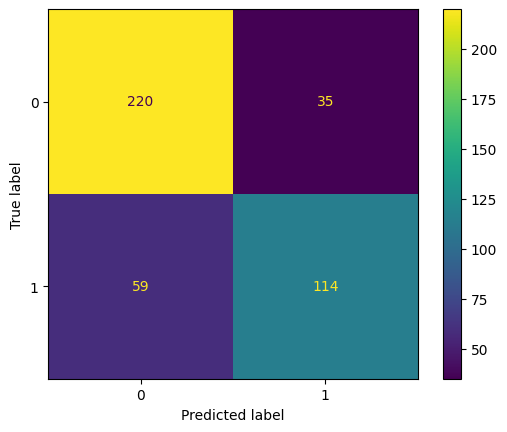

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y_pred = classifier.predict(X_test)  
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X, Y, cv=5)  
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.78321678 0.81818182 0.77464789 0.73239437 0.78873239]
Mean Accuracy: 0.779434649857185


In [23]:
from sklearn.metrics import classification_report

Y_pred = classifier.predict(X_test)  
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       255
           1       0.77      0.66      0.71       173

    accuracy                           0.78       428
   macro avg       0.78      0.76      0.77       428
weighted avg       0.78      0.78      0.78       428

